# Unit 3: The Great Equaliser

### Learning Outcomes
By the end of this unit, students will be capable of:
* Recognising why data with different scales cannot be compared directly.
* Applying Min–Max scaling to numerical data.
* Comparing original and scaled data using graphs.
* Explaining how scaling enables fair comparison between quantities.

<iframe width="560" height="315" src="https://www.youtube.com/embed/eFe2R0fnMAs?si=IfFmO-INuifM25VT" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Introduction
In the last unit, you explored a small weather dataset and learned how to describe it using statistics and simple visualisations. Now you will try something new. You will compare two different columns in the same graph.

Before you begin, think about this simple idea. In many Indian knowledge traditions, balance and proportion were considered important for understanding the world. Whether it was the ratio of ingredients in Ayurveda, the harmony of notes in classical music, or the careful measurement of shadows in ancient astronomy, scholars always paid attention to how different quantities relate to each other.

In the same way, when you compare numbers in a dataset, you must be careful about proportions. Some numbers may be small, like daily temperatures. Some may be large, like air pressure. If you try to compare them directly in a single graph, the larger numbers will dominate the picture and the smaller numbers will look almost invisible. To make a fair comparison, you need a way to place them on similar scales. This is called scaling.

You will now see this problem for yourself and then learn how to solve it.

## Activity 3.1: Trying to Compare Without Scaling

We will begin with a simple attempt. You will plot Temperature and Air Pressure on the same graph.
Before we can do it - we will upload the weather dataset file we saved in Unit 2.

In [1]:
import pandas as pd
df = pd.read_csv('weather_data.csv')

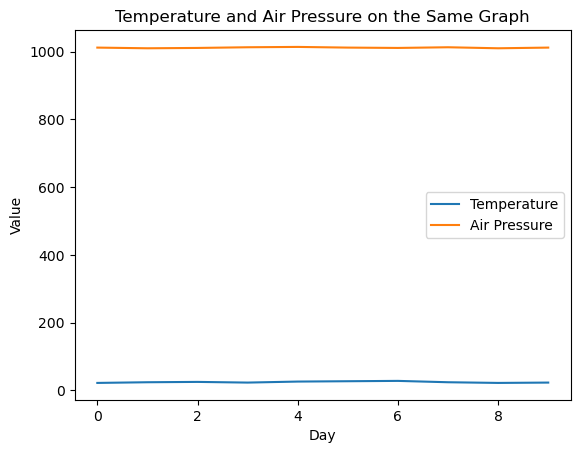

In [2]:
import matplotlib.pyplot as plt

plt.plot(df["Temperature"], label="Temperature")
plt.plot(df["AirPressure"], label="Air Pressure")
plt.xlabel("Day")
plt.ylabel("Value")
plt.title("Temperature and Air Pressure on the Same Graph")
plt.legend()
plt.show()

When you run this, you will notice something unusual. The line for Air Pressure sits high up on the graph, while the line for Temperature looks almost flat near the bottom. The two lines cannot be compared properly because their numbers live in very different ranges. Temperature values go from about 22 to 28. Air Pressure values go from about 1010 to 1014.

This is the same as trying to compare the height of a pencil to the height of a building using the same measuring stick. The building will always dominate the picture, and the pencil will seem almost invisible.

```{image} /images/figure3.1.png
:alt: Description of the image
:class: bg-primary mb-1
:width: 300px
:align: center
```



This is why you need a method that equalises the scale.

## Activity 3.2: Understanding the Idea of Scaling

Scaling is a simple idea. You take a list of numbers and convert them into a new list where the smallest value becomes 0 and the largest value becomes 1. Everything else falls somewhere between 0 and 1. The relative relationships stay the same, but the scale becomes equal.

This idea is very similar to ratios, which you have already learned in mathematics. A ratio compares quantities by reducing them to a simpler form. Scaling also reduces numbers to a simpler, common form so that they can be compared fairly.

The most common scaling method is called Min Max scaling. You do not need to memorise a formula. You only need to understand that scaling helps the computer place different columns on the same level without changing their basic behaviour.

Now you will apply scaling to the Temperature and Air Pressure columns.

### Animation 3.1

The animation shows how min–max scaling works step by step.
It first displays the original data values on a number line and highlights the smallest and largest values.

Next, each value is rescaled so that all values lie between 0 and 1. As this happens, the positions of the points change, but their order remains the same.

This makes it clear that min–max scaling changes the scale of the data, not the pattern or relationships within it.

In [ ]:
from IPython.display import Video
Video("images/min-max-scaling.mp4", width=600, embed=True)

## Activity 3.3: Performing Min Max Scaling in Python

To scale a column, you subtract the minimum value and divide by the range.

Here is how to scale Temperature:

In [3]:
temp_min = df["Temperature"].min()
temp_max = df["Temperature"].max()

df["Temperature_scaled"] = (df["Temperature"] - temp_min) / (temp_max - temp_min)
df[["Temperature", "Temperature_scaled"]]

,Temperature,Temperature_scaled
0,22,0.000000
1,24,0.333333
2,25,0.500000
3,23,0.166667
4,26,0.666667
5,27,0.833333
6,28,1.000000
7,24,0.333333
8,22,0.000000
9,23,0.166667


Now do the same for Air Pressure:

In [4]:
press_min = df["AirPressure"].min()
press_max = df["AirPressure"].max()

df["AirPressure_scaled"] = (df["AirPressure"] - press_min) / (press_max - press_min)
df[["AirPressure", "AirPressure_scaled"]]

,AirPressure,AirPressure_scaled
0,1012,0.50
1,1010,0.00
2,1011,0.25
3,1013,0.75
4,1014,1.00
5,1012,0.50
6,1011,0.25
7,1013,0.75
8,1010,0.00
9,1012,0.50


Look at the new values. The smallest original value becomes 0. The largest becomes 1. Everything else falls between 0 and 1. The meaning of the data has not changed. Only the scale has changed.

This lets you compare the two columns more fairly.

## Activity 3.4: Re-plotting After Scaling

Now you will create the same plot as before, but using the scaled columns.

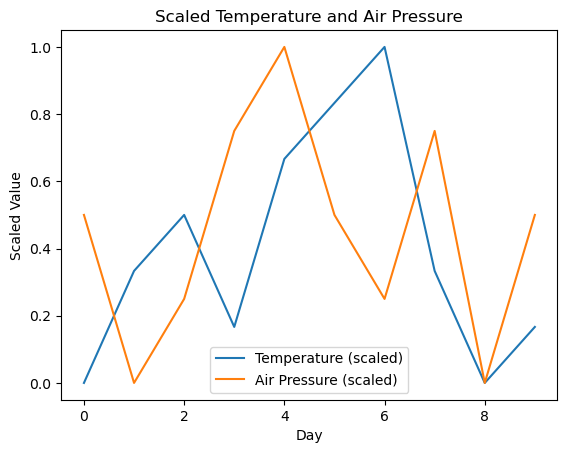

In [5]:
plt.plot(df["Temperature_scaled"], label="Temperature (scaled)")
plt.plot(df["AirPressure_scaled"], label="Air Pressure (scaled)")
plt.xlabel("Day")
plt.ylabel("Scaled Value")
plt.title("Scaled Temperature and Air Pressure")
plt.legend()
plt.show()

This time, both lines appear in a similar range. You can clearly see how the Temperature and Air Pressure change over the ten days. Neither line hides the other. Both are visible and fair to compare.

Scaling does not change the story of the data. It only brings the characters to the same stage, so you can see how they move together.

## Practice Exercises

Try these exercises to strengthen your understanding. Solutions are provided below each question.

1. What are the minimum and maximum values of the Temperature and Air Pressure columns?

   Hint: Use `df["Temperature"].min()` and `df["Temperature"].max()`.

2. After scaling, what value becomes 0 and what value becomes 1 in each column?

   Hint: Look at your `Temperature_scaled` and `AirPressure_scaled` columns.

3. Plot the original Temperature and the scaled Temperature on two separate graphs. What differences do you notice?

   Hint: The shape should stay the same even though the scale changes.

4. Scale the Humidity column using the same method.

   Hint: Follow the pattern used for Temperature and Air Pressure.

5. If two columns have very different units, such as Celsius and hPa, why is scaling helpful before comparing them?

   Hint: Think about whether large numbers will overshadow small ones in a graph.

### Solutions

1. Minimum and maximum for the original columns.

In [7]:
df["Temperature"].min(), df["Temperature"].max()
df["AirPressure"].min(), df["AirPressure"].max()

(1010, 1014)

2. The minimum becomes 0. The maximum becomes 1. All other values fall between 0 and 1.

3. Plotting original vs scaled Temperature.

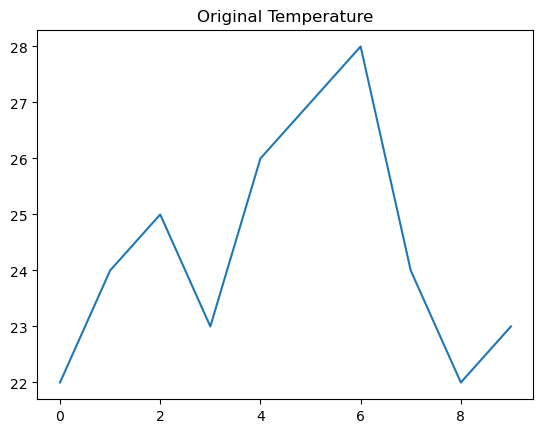

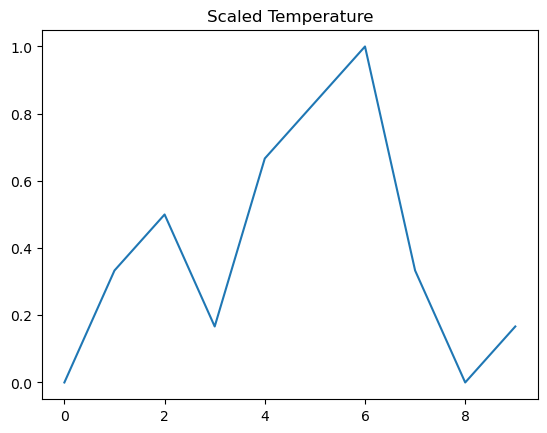

In [8]:
plt.plot(df["Temperature"])
plt.title("Original Temperature")
plt.show()

plt.plot(df["Temperature_scaled"])
plt.title("Scaled Temperature")
plt.show()

The shape is the same. But notice the y-axis, the scales are different.

4. Scaling the Humidity column.

In [9]:
hum_min = df["Humidity"].min()
hum_max = df["Humidity"].max()

df["Humidity_scaled"] = (df["Humidity"] - hum_min) / (hum_max - hum_min)
df[["Humidity", "Humidity_scaled"]]

,Humidity,Humidity_scaled
0,60,0.142857
1,62,0.285714
2,58,0.000000
3,65,0.500000
4,70,0.857143
5,72,1.000000
6,68,0.714286
7,64,0.428571
8,59,0.071429
9,61,0.214286


Scaling is helpful because it removes the effect of large numbers overpowering small numbers. This allows different quantities to be compared fairly in the same graph.

## Reflection

Think back on what you observed in this unit. When you first plotted Temperature and Air Pressure together, one line almost disappeared. After scaling, both lines became visible and easy to compare. This shows how important scale is when working with data.

Ask yourself:

* What did scaling help you see that you could not see before?
* How did the idea of proportions from mathematics help you understand scaling?
* Where have you seen similar ideas of balance or equalisation in real life or in traditional practices?
* If you were given a new dataset tomorrow with very large and very small values, what would you do before comparing them?